In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.14.0


In [19]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [22]:
train_labels.shape

(60000,)

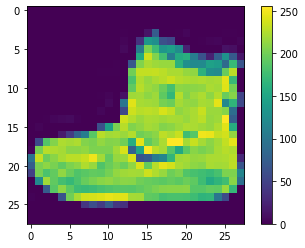

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


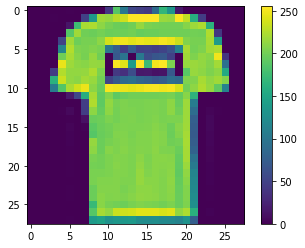

In [24]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0


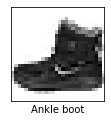

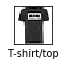

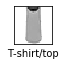

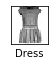

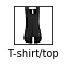

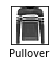

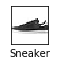

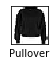

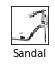

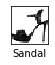

In [27]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()


In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5031 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3809 - acc: 0.8639
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3425 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3151 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2955 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2816 - acc: 0.8952
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2689 - acc: 0.8997
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2576 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2488 - acc: 0.9075
Epoch 10/10
60000/60000 [==============================] - 3s 50us/sample - loss: 

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3291 - acc: 0.8883

Test accuracy: 0.8883


In [32]:
predictions = model.predict(test_images)


In [33]:
predictions[0]

array([1.6563571e-07, 4.5169513e-09, 1.1521062e-06, 3.0475864e-08,
       5.5797602e-07, 5.0466007e-04, 1.6784576e-06, 9.7391959e-03,
       4.5325680e-07, 9.8975205e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])


9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


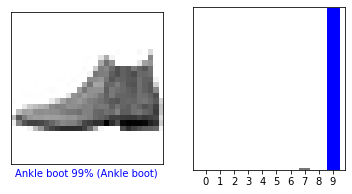

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


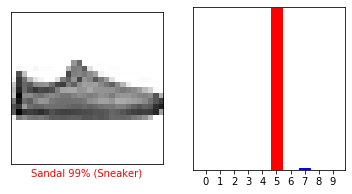

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


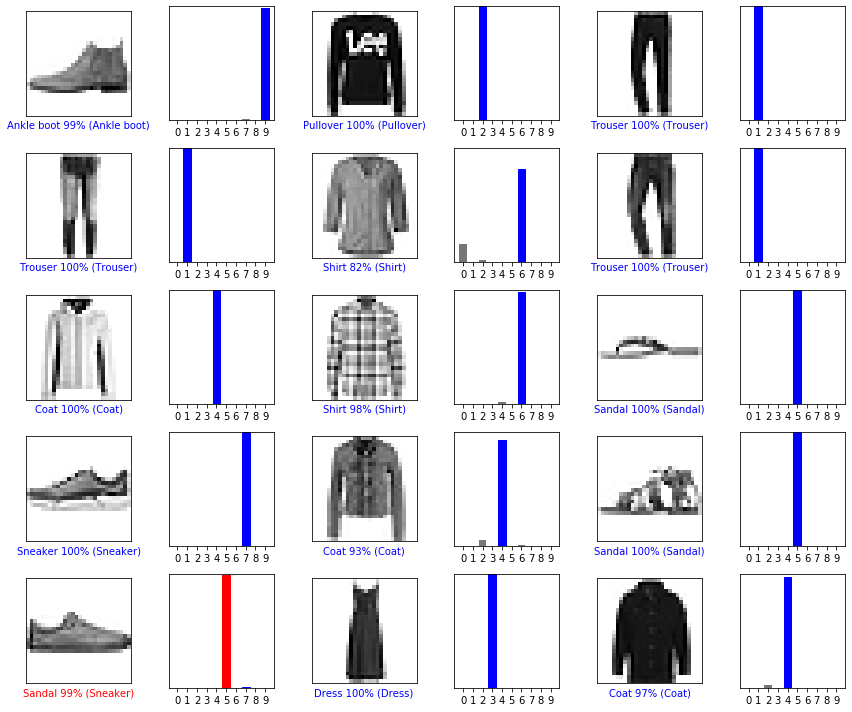

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [39]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [41]:
predictions_single = model.predict(img)

print(predictions_single)


[[2.1586050e-06 5.3997879e-16 9.9939442e-01 6.0211479e-14 5.5373769e-04
  3.4884476e-12 4.9725535e-05 1.5423318e-18 1.2558620e-11 1.2815552e-15]]


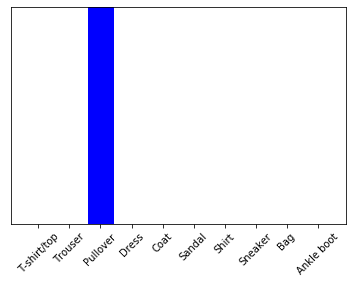

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [43]:
np.argmax(predictions_single[0])


2